In [1]:
#importing libraries
!pip install seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
!pip install --upgrade keras
from keras import layers
from tensorflow.keras import models, layers
from tensorflow import keras
from tensorflow.keras import regularizers
!pip install git+https://github.com/tensorflow/docs
from  IPython import display
from matplotlib import pyplot as plt
import pathlib
import shutil
import tempfile
import tensorflow_docs as tfdocs
import tensorflow_docs.modeling
import tensorflow_docs.plots
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
from IPython.display import SVG
from tensorflow.keras.utils import plot_model
from tensorflow.keras import datasets, layers, models
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix
from itertools import product
from tensorflow.keras import metrics
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import backend as K
from tensorflow.keras.metrics import Precision, Recall



Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python -m pip install --upgrade pip


2023-12-21 23:34:30.071464: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-21 23:34:30.106163: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-21 23:34:30.106198: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-21 23:34:30.107186: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-21 23:34:30.112559: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-21 23:34:30.112935: I tensorflow/core/platform/cpu_feature_guard.cc:1

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python -m pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable
  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-jxcmdsou
  Running command git clone --filter=blob:none --quiet https://github.com/tensorflow/docs /tmp/pip-req-build-jxcmdsou
  Resolved https://github.com/tensorflow/docs to commit 8246c1cba26bb07d9c02c165d83936c5b50825ca
  Preparing metadata (setup.py) ... done

[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python -m pip install --upgrade pip


In [2]:
# Load the dataset:
train_data  = np.load('fashion_train.npy')
test_data = np.load('fashion_test.npy')

## Use shape[0] and shape[1] to get the number of samples (rows) and the number of features (columns), 
#respectively, from the dataset.


print("Fashion MNIST train -  rows:",train_data.shape[0]," columns:", train_data.shape[1])
print("Fashion MNIST test -  rows:",test_data.shape[0]," columns:", test_data.shape[1])

Fashion MNIST train -  rows: 10000  columns: 785
Fashion MNIST test -  rows: 5000  columns: 785


In [3]:
### Preprocessing te data (using as an exampel from here: https://www.kaggle.com/code/sisharaneranjana/fashion-mnist-classification-with-cnn

def preprocess_data(data):
    # Assuming the last column of 'data' contains the labels
    labels = to_categorical(data[:, -1], num_classes=5)  # Convert labels to categorical labels

    # Extracting the features (all columns except the last)
    features = data[:, :-1]

    # Reshaping the features to a suitable format for a CNN
    num_samples = data.shape[0] # Total number of samples in fro the dataset
    reshaped_features = features.reshape(num_samples, 28, 28, 1)  # Reshape to (num_samples, 28, 28, 1)

    # Normalizing the pixel values of the images to the range [0, 1]
    normalized_features = reshaped_features / 255.0

    return normalized_features, labels



X, y = preprocess_data(train_data)
X_test, y_test = preprocess_data(test_data)


#### Using sklearn train_test_split function:
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=1234)




print("training set size",x_train.shape[0], x_train.shape[1:])
print("validation set size",x_val.shape[0], x_val.shape[1:])
print("test set size",X_test.shape[0]," columns:", X_test.shape[1:])

training set size 8000 (28, 28, 1)
validation set size 2000 (28, 28, 1)
test set size 5000  columns: (28, 28, 1)


In [4]:
## To build the convolutional layers, based from https://www.tensorflow.org/tutorials/images/cnn and 
## https://www.kaggle.com/code/sisharaneranjana/fashion-mnist-classification-with-cnn

# Initializes a Sequential model,consits of a single stack of layers, with each layer
# contains one input and one output tonsor.

model = models.Sequential()

# First convolutional block. Adds a 2D layer,and 32 number of filters (or kernels) with 3x3 pixels
#We use ReLU (Rectified Linear Unit) as activation function for the input, and for the output, we used Softmas
# as activation function
# The BatchNormalization() function is used to stabilize the learning process, and it made an impact
# after I applied it.
# We add pooling layer to scan through the input images with defines windows size (pool_size,(2,2))
# The window slides over the image according to the specified number of strides (in this case, None
# which default). And no padding was applied.
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2), strides=None, padding='valid')) 

# Second convolutional block. As we move into more blocks,
#layers to learn more complex features
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2), strides=None, padding='valid'))  
# Third convolutional block
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2), strides=None, padding='valid'))  

# Flatten and dense block. The Flatten layer transforms into 1D-dimensional array. The Dense layers are 
## fully connected layers! Each neuron in this layer receives input from flattened array. in a common CNN architecture for tasks 
#like image classification, the flow of data is as follows: 
#Input Image → Convolutional Layers → Pooling Layers → Flatten Layer → Dense Layers
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))  # Increased dropout rate for dense layer
model.add(layers.Dense(5, activation='softmax'))  # We have 5 classes

model.summary()


/home/muna/.local/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)        │        320 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ batch_normalization             │ (None, 26, 26, 32)        │        128 │
│ (BatchNormalization)            │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)        │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)        │     18,496 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ batch_normalization_1           │ (None, 11, 11, 64)        │        256 │
│ (BatchNormalization)            │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)          │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)          │     36,928 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ batch_normalization_2           │ (None, 3, 3, 64)          │        256 │
│ (BatchNormalization)            │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 1, 1, 64)          │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ flatten (Flatten)               │ (None, 64)                │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense (Dense)                   │ (None, 64)                │      4,160 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout (Dropout)               │ (None, 64)                │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1 (Dense)                 │ (None, 5)                 │        325 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 60,869 (237.77 KB)

 Trainable params: 60,549 (236.52 KB)

 Non-trainable params: 320 (1.25 KB)

In [5]:
### I have combined model, and optimizer into one function, as recommanded here and called the mode, CNN.
### https://www.tensorflow.org/tutorials/keras/overfit_and_underfit




# Define precision and recall metrics outside the f1_score function
precision_metric = metrics.Precision()
recall_metric = metrics.Recall()



# Assuming one step per batch for simplicity
STEPS_PER_EPOCH = len(x_train) // 250  # Adjust based on batch size and training set size

lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(
    0.001,
    decay_steps=STEPS_PER_EPOCH * 100,  # 100 epochs
    decay_rate=1,
    staircase=False
)



def f1_score(y_true, y_pred):
    precision = precision_metric(y_true, y_pred)
    recall = recall_metric(y_true, y_pred)
    return 2 * ((precision * recall) / (precision + recall + K.epsilon()))

def compile_and_fit(model, name, optimizer=None, max_epochs=100):
    if optimizer is None:
        optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)  # Default optimizer

    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=[
                      'accuracy',
                      precision_metric,
                      recall_metric,
                      f1_score
                  ])

    model.summary()

    early_stopping = EarlyStopping(
        monitor='val_loss',  # Monitor the validation loss
        patience=5,         # Number of epochs with no improvement
        restore_best_weights=True  # Restore model weights from the best epoch
    )

    history = model.fit(
        x_train, y_train,
        batch_size=250,
        epochs=max_epochs,
        validation_data=(x_val, y_val),
        callbacks=[early_stopping]
        
    )   
    return history

# Example usage
history = compile_and_fit(model, 'Base_Model')


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)        │        320 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ batch_normalization             │ (None, 26, 26, 32)        │        128 │
│ (BatchNormalization)            │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)        │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)        │     18,496 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ batch_normalization_1           │ (None, 11, 11, 64)        │        256 │
│ (BatchNormalization)            │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)          │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)          │     36,928 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ batch_normalization_2           │ (None, 3, 3, 64)          │        256 │
│ (BatchNormalization)            │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 1, 1, 64)          │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ flatten (Flatten)               │ (None, 64)                │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense (Dense)                   │ (None, 64)                │      4,160 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout (Dropout)               │ (None, 64)                │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1 (Dense)                 │ (None, 5)                 │        325 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 60,869 (237.77 KB)

 Trainable params: 60,549 (236.52 KB)

 Non-trainable params: 320 (1.25 KB)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 121ms/step - accuracy: 0.4397 - f1_score: 0.3060 - loss: 1.7266 - precision: 0.4994 - recall: 0.3314 - val_accuracy: 0.1880 - val_f1_score: 0.0000e+00 - val_loss: 1.6091 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - accuracy: 0.7317 - f1_score: 0.7110 - loss: 0.6875 - precision: 0.7963 - recall: 0.6407 - val_accuracy: 0.2755 - val_f1_score: 0.0000e+00 - val_loss: 1.6392 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step - accuracy: 0.7983 - f1_score: 0.7833 - loss: 0.5632 - precision: 0.8413 - recall: 0.7361 - val_accuracy: 0.1960 - val_f1_score: 0.0000e+00 - val_loss: 1.6235 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 113ms/step - accuracy: 0.8155 - f1_score: 0.8098 - loss: 0.4908 - precision: 0.8641 - recall: 0.7659 - val_accuracy: 0.3080 - val_f1_score: 0.0000e+00 - val_loss: 

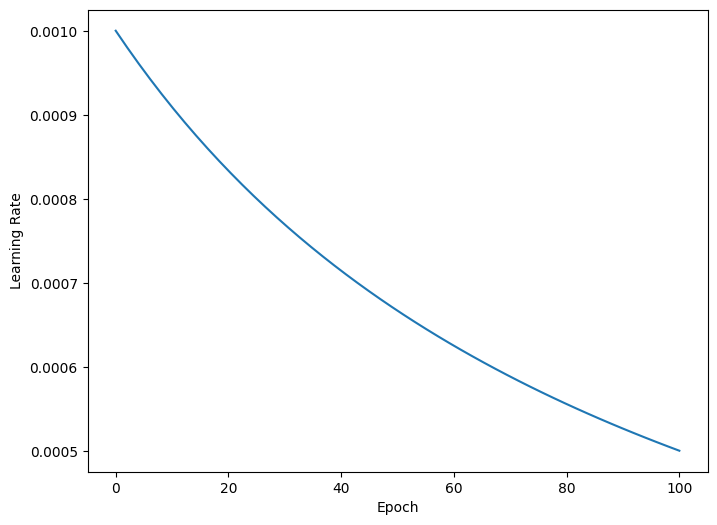

In [6]:
# Plot the learning rate schedule
step = np.linspace(0, STEPS_PER_EPOCH * 100)
lr = lr_schedule(step)
plt.figure(figsize=(8, 6))
plt.plot(step / STEPS_PER_EPOCH, lr)
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.show()

In [7]:
size_histories = {}


# Create a dictionary for histories
size_histories = {'Base_Model': history}

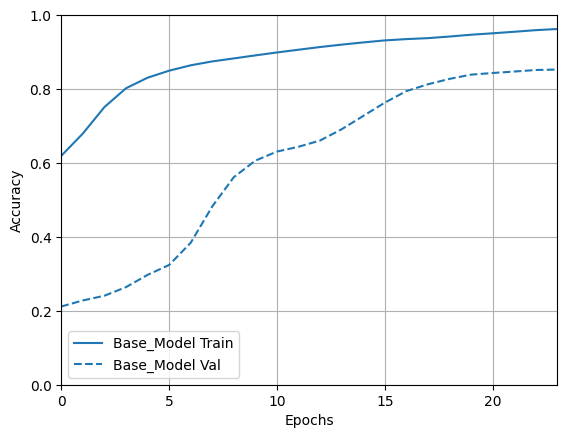

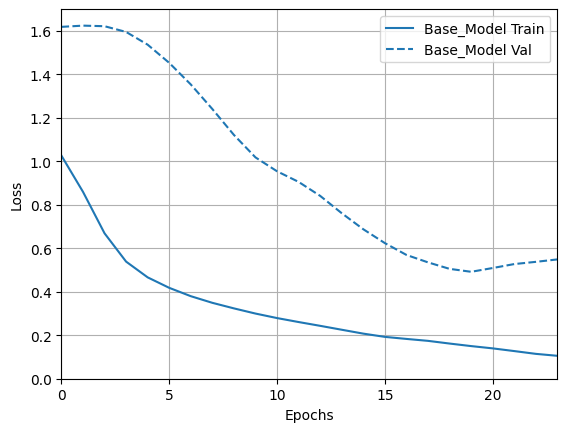

In [8]:
#Accuracy

plotter = tfdocs.plots.HistoryPlotter(smoothing_std=10)
# Plotting the loss for both training and validation
plotter.plot(size_histories, metric="accuracy")
plt.ylim([0,max(plt.ylim())])
plt.show()

#Loss

plotter = tfdocs.plots.HistoryPlotter(smoothing_std=10)
# Plotting the loss for both training and validation
plotter.plot(size_histories, metric="loss")
plt.ylim([0,max(plt.ylim())])
plt.show()


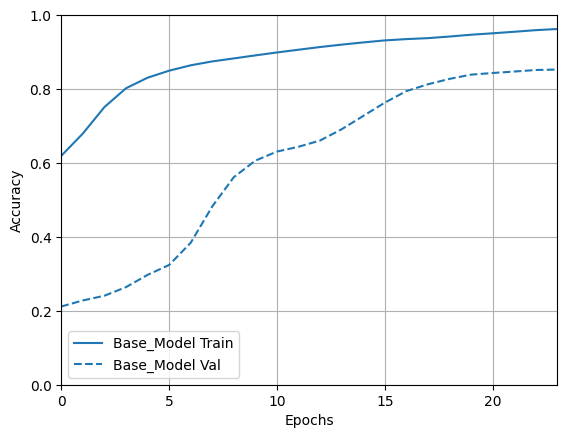

In [9]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=10)
# Plotting the loss for both training and validation
plotter.plot(size_histories, metric="accuracy")
plt.ylim([0,max(plt.ylim())])
plt.show()


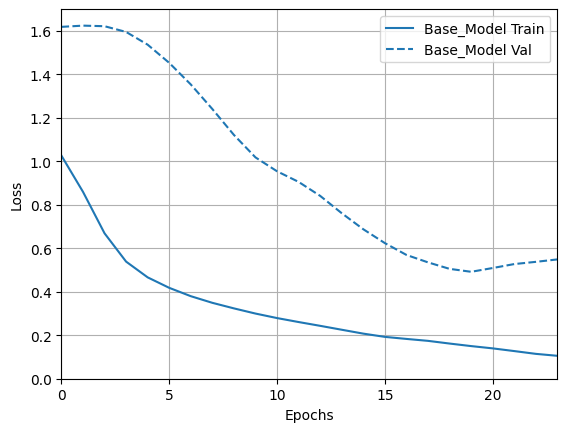

In [10]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=10)
# Plotting the loss for both training and validation
plotter.plot(size_histories, metric="loss")
plt.ylim([0,max(plt.ylim())])
plt.show()

In [11]:
regularizer_histories = {}

In [12]:
FEATURES = 784

l2_model = tf.keras.Sequential([
    layers.Flatten(input_shape=(28, 28, 1)), 
    layers.Dense(512,  activation='relu',
                 kernel_regularizer=regularizers.l2(0.001),
                 input_shape=(FEATURES,)),
    
    layers.Dense(512,  activation='relu',
                 kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(512,  activation='relu',
                 kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(512,  activation='relu',
                 kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(5, activation='softmax')
])

regularizer_histories['l2'] = compile_and_fit(l2_model, "regularizers/l2")

/home/muna/.local/lib/python3.9/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/home/muna/.local/lib/python3.9/site-packages/keras/src/layers/core/dense.py:73: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)               │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_2 (Dense)                 │ (None, 512)               │    401,920 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_3 (Dense)                 │ (None, 512)               │    262,656 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_4 (Dense)                 │ (None, 512)               │    262,656 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_5 (Dense)                 │ (None, 512)               │    262,656 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_6 (Dense)                 │ (None, 5)                 │      2,565 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 1,192,453 (4.55 MB)

 Trainable params: 1,192,453 (4.55 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.6453 - f1_score: 0.7256 - loss: 2.8087 - precision: 0.8385 - recall: 0.6392 - val_accuracy: 0.8240 - val_f1_score: 0.8277 - val_loss: 1.7566 - val_precision: 0.8561 - val_recall: 0.7915
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.8153 - f1_score: 0.8090 - loss: 1.6671 - precision: 0.8490 - recall: 0.7710 - val_accuracy: 0.8425 - val_f1_score: 0.8540 - val_loss: 1.3628 - val_precision: 0.8830 - val_recall: 0.8035
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.8561 - f1_score: 0.8580 - loss: 1.2978 - precision: 0.8844 - recall: 0.8188 - val_accuracy: 0.8515 - val_f1_score: 0.8712 - val_loss: 1.1749 - val_precision: 0.8843 - val_recall: 0.8295
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.8613 - f1_score: 0.8567 - loss: 1.1282 - precision: 0.8898 - recall: 0.8319 - val_accuracy: 0.8555 - val_f1_score: 0.8722 - val_loss: 1.0555 - val_precision: 0.8881 - val_recall:

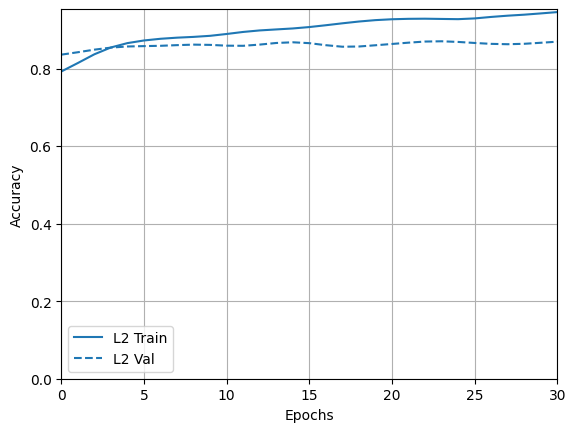

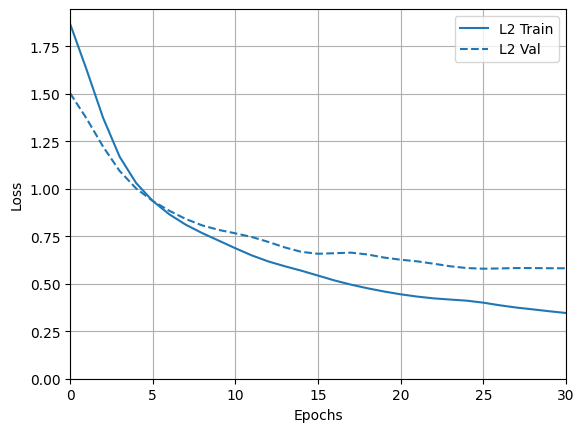

In [13]:

plotter = tfdocs.plots.HistoryPlotter(smoothing_std=10)
plotter.plot(regularizer_histories,metric = "accuracy")
plt.ylim([0,max(plt.ylim())])  

plt.show()




plotter = tfdocs.plots.HistoryPlotter(smoothing_std=10)
plotter.plot(regularizer_histories,metric = "loss")
plt.ylim([0,max(plt.ylim())])  

plt.show()

In [14]:
score = model.evaluate(X_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8339 - f1_score: 0.8354 - loss: 0.4950 - precision: 0.8561 - recall: 0.8129
Test loss: 0.49023374915122986
Test accuracy: 0.8371999859809875


In [15]:
score = l2_model.evaluate(X_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8568 - f1_score: 0.8589 - loss: 0.6116 - precision: 0.8704 - recall: 0.8434
Test loss: 0.6158264875411987
Test accuracy: 0.8543999791145325


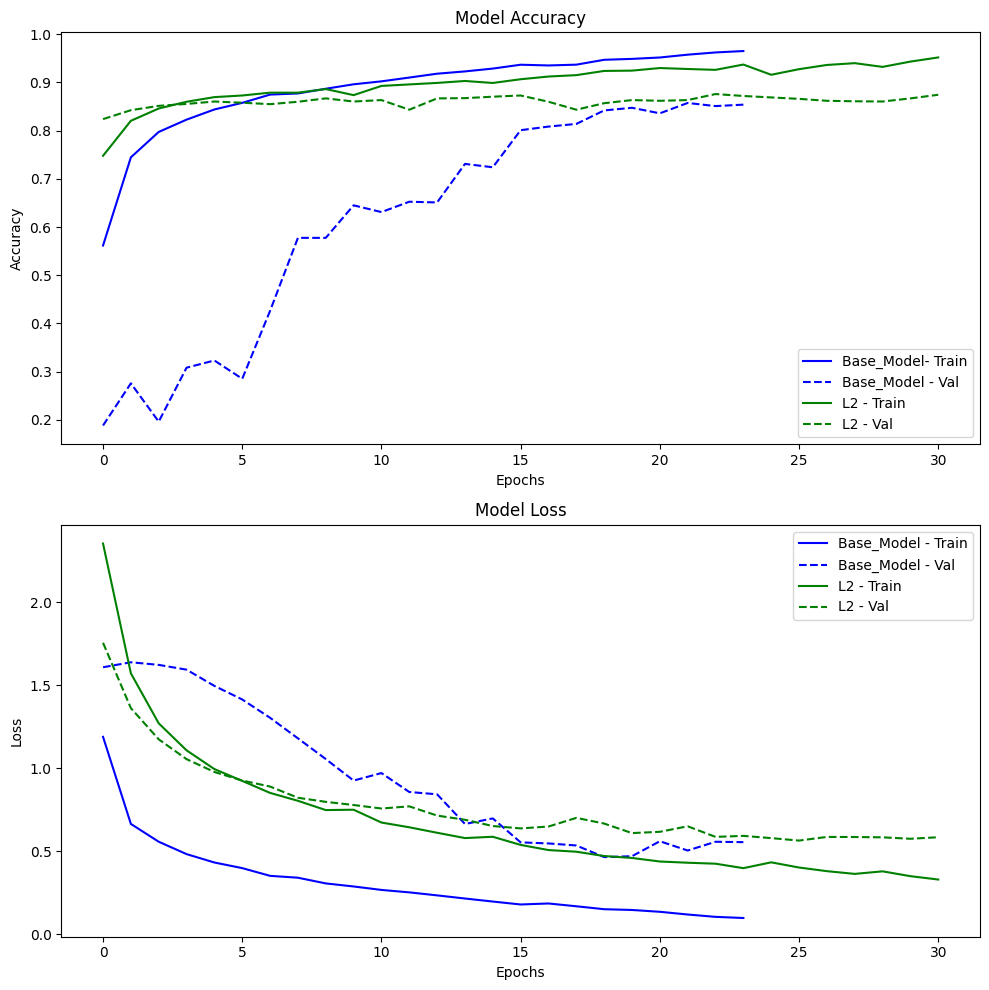

In [16]:
import matplotlib.pyplot as plt

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

# Plot Accuracy on the first subplot
ax1.set_title('Model Accuracy')
ax1.plot(size_histories['Base_Model'].history['accuracy'], label='Base_Model- Train', color='blue')
ax1.plot(size_histories['Base_Model'].history['val_accuracy'], label='Base_Model - Val', color='blue', linestyle='--')
ax1.plot(regularizer_histories['l2'].history['accuracy'], label='L2 - Train', color='green')
ax1.plot(regularizer_histories['l2'].history['val_accuracy'], label='L2 - Val', color='green', linestyle='--')
ax1.set_xlabel('Epochs')

ax1.set_ylabel('Accuracy')
ax1.legend()

# Plot Loss on the second subplot
ax2.set_title('Model Loss')
ax2.plot(size_histories['Base_Model'].history['loss'], label='Base_Model - Train', color='blue')
ax2.plot(size_histories['Base_Model'].history['val_loss'], label='Base_Model - Val', color='blue', linestyle='--')
ax2.plot(regularizer_histories['l2'].history['loss'], label='L2 - Train', color='green')
ax2.plot(regularizer_histories['l2'].history['val_loss'], label='L2 - Val', color='green', linestyle='--')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.legend()

# Show the plot
plt.tight_layout()
plt.show()


157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


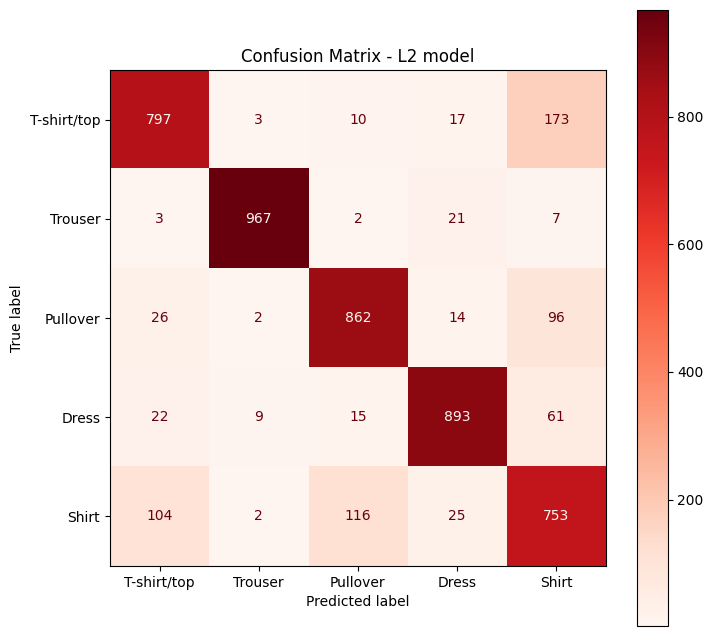

In [17]:
# Source https://www.kaggle.com/code/mehrdadsadeghi/fashionmnist-cnn-with-tensorflow-confusionmatrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Get model predictions
preds = l2_model.predict(X_test)
y_true = np.argmax(y_test, axis=1)
y_pred = np.argmax(preds, axis=1)

# Define the class labels
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Shirt']

# Create the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
fig, ax = plt.subplots(figsize=(8, 8))
disp.plot(ax=ax, cmap=plt.cm.Reds)

# Customize the plot
plt.title('Confusion Matrix - L2 model')
plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.show()


157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


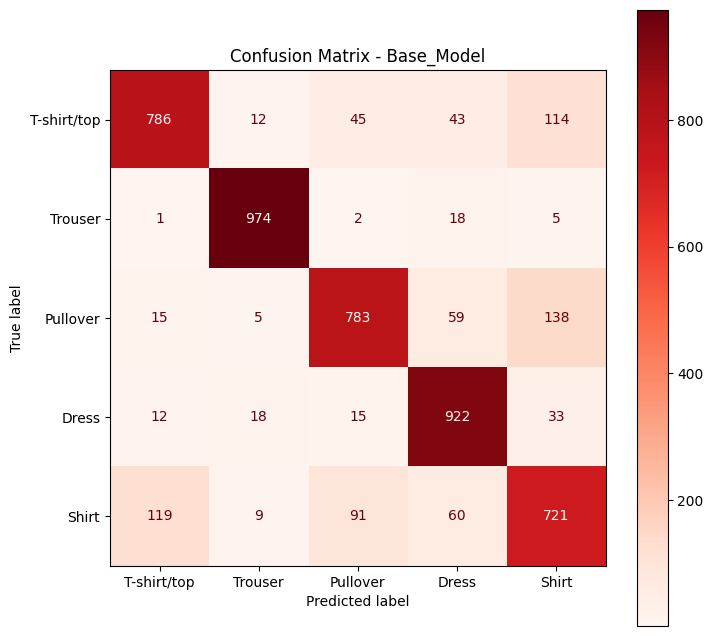

In [18]:
# Source :https://www.kaggle.com/code/mehrdadsadeghi/fashionmnist-cnn-with-tensorflow-confusionmatrix

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Make predictions
y_probs = model.predict(X_test)

# Convert prediction probabilities into integers
y_preds = y_probs.argmax(axis=1)

# Define the class labels
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Shirt']

# Create the confusion matrix
cm = confusion_matrix(np.argmax(y_test, axis=1), y_preds)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
fig, ax = plt.subplots(figsize=(8, 8))
disp.plot(ax=ax, cmap=plt.cm.Reds)

# Customize the plot
plt.title('Confusion Matrix - Base_Model')
plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.show()


In [19]:
from sklearn.metrics import precision_recall_fscore_support

# Make predictions
y_pred = l2_model.predict(X_test)
y_pred_classes = tf.argmax(y_pred, axis=1)

# Convert y_test to the same format as y_pred_classes if it's one-hot encoded
y_true_classes = tf.argmax(y_test, axis=1) if len(y_test.shape) > 1 else y_test

# Get precision, recall, and F1 score for the entire model
precision, recall, f1, _ = precision_recall_fscore_support(y_true_classes, y_pred_classes, average='weighted')

print(f"Weighted Precision: {precision:.4f}, Weighted Recall: {recall:.4f}, Weighted F1 Score: {f1:.4f}")


157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Weighted Precision: 0.8580, Weighted Recall: 0.8544, Weighted F1 Score: 0.8558


In [20]:
#  F1_score to accept precision and recall values
def f1_score(y_true, y_pred):
    precision = precision_metric(y_true, y_pred)
    recall = recall_metric(y_true, y_pred)
    return 2 * ((precision * recall) / (precision + recall + K.epsilon()))


# Define the class labels
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Shirt']

# Calculate the number of classes
num_classes = len(classes)

# Make predictions
y_pred = l2_model.predict(X_test)
y_pred_classes = tf.argmax(y_pred, axis=1)

from sklearn.metrics import precision_recall_fscore_support

# Convert y_test to the same format as y_pred_classes if it's one-hot encoded
y_true_classes = tf.argmax(y_test, axis=1) if len(y_test.shape) > 1 else y_test

# Get precision, recall, and F1 score for each class
precision, recall, f1, _ = precision_recall_fscore_support(y_true_classes, y_pred_classes, labels=range(num_classes))

# Print precision, recall, and F1 score for each class
for i, class_name in enumerate(classes):
    print(f"Class: {class_name} - Precision: {precision[i]:.4f}, Recall: {recall[i]:.4f}, F1 Score: {f1[i]:.4f}")


157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Class: T-shirt/top - Precision: 0.8372, Recall: 0.7970, F1 Score: 0.8166
Class: Trouser - Precision: 0.9837, Recall: 0.9670, F1 Score: 0.9753
Class: Pullover - Precision: 0.8577, Recall: 0.8620, F1 Score: 0.8599
Class: Dress - Precision: 0.9206, Recall: 0.8930, F1 Score: 0.9066
Class: Shirt - Precision: 0.6908, Recall: 0.7530, F1 Score: 0.7206


In [21]:
from sklearn.metrics import precision_recall_fscore_support

# Make predictions
y_pred = model.predict(X_test)
y_pred_classes = tf.argmax(y_pred, axis=1)

# Convert y_test to the same format as y_pred_classes if it's one-hot encoded
y_true_classes = tf.argmax(y_test, axis=1) if len(y_test.shape) > 1 else y_test

# Get precision, recall, and F1 score for the entire model
precision, recall, f1, _ = precision_recall_fscore_support(y_true_classes, y_pred_classes, average='weighted')

print(f"Weighted Precision: {precision:.4f}, Weighted Recall: {recall:.4f}, Weighted F1 Score: {f1:.4f}")


157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Weighted Precision: 0.8371, Weighted Recall: 0.8372, Weighted F1 Score: 0.8364


In [22]:


# F1_score to accept precision and recall values
def f1_score(y_true, y_pred):
    precision = precision_metric(y_true, y_pred)
    recall = recall_metric(y_true, y_pred)
    return 2 * ((precision * recall) / (precision + recall + K.epsilon()))

# Make predictions
y_pred = model.predict(X_test)
y_pred_classes = tf.argmax(y_pred, axis=1)

from sklearn.metrics import precision_recall_fscore_support

# Convert y_test to the same format as y_pred_classes if it's one-hot encoded
y_true_classes = tf.argmax(y_test, axis=1) if len(y_test.shape) > 1 else y_test

# Get precision, recall, and F1 score for each class
precision, recall, f1, _ = precision_recall_fscore_support(y_true_classes, y_pred_classes, labels=range(num_classes))

# Initialize classes and num_classes
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Shirt']
num_classes = len(classes)

# Print precision, recall, and F1 score for each class
for i, class_name in enumerate(classes):
    print(f"Class: {class_name} - Precision: {precision[i]:.4f}, Recall: {recall[i]:.4f}, F1 Score: {f1[i]:.4f}")


157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Class: T-shirt/top - Precision: 0.8424, Recall: 0.7860, F1 Score: 0.8132
Class: Trouser - Precision: 0.9568, Recall: 0.9740, F1 Score: 0.9653
Class: Pullover - Precision: 0.8365, Recall: 0.7830, F1 Score: 0.8089
Class: Dress - Precision: 0.8367, Recall: 0.9220, F1 Score: 0.8773
Class: Shirt - Precision: 0.7132, Recall: 0.7210, F1 Score: 0.7171
